In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [5]:
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']



 Model Evaluation Metrics:
Mean Absolute Error (MAE): $2550.08
Root Mean Squared Error (RMSE): $4576.30
R2 Score: 0.87

Sample Predictions (Actual vs Predicted):
   Actual Charges  Predicted Charges
0      9095.06825        9630.262601
1      5272.17580        5570.196677
2     29330.98315       28239.647086
3      9301.89355       12462.682487
4     33750.29180       34640.860712
5      4536.25900        8225.296883
6      2117.33885        2099.045651
7     14210.53595       14566.864047
8      3732.62510        5626.389833
9     10264.44210       10791.998420


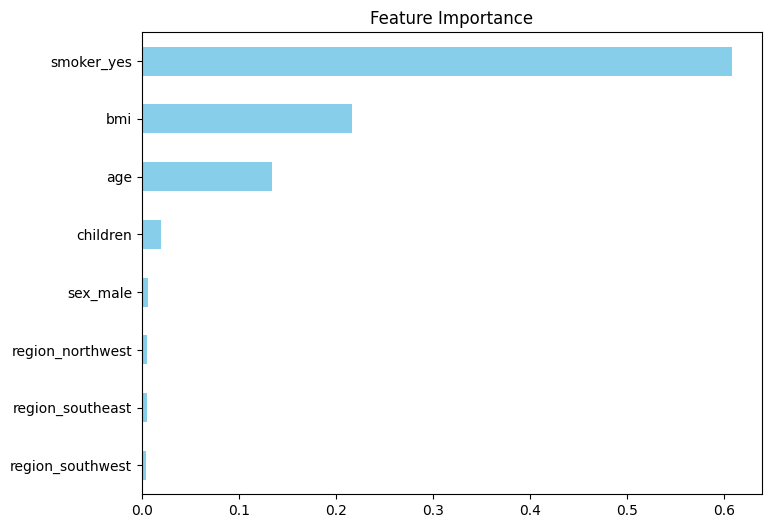

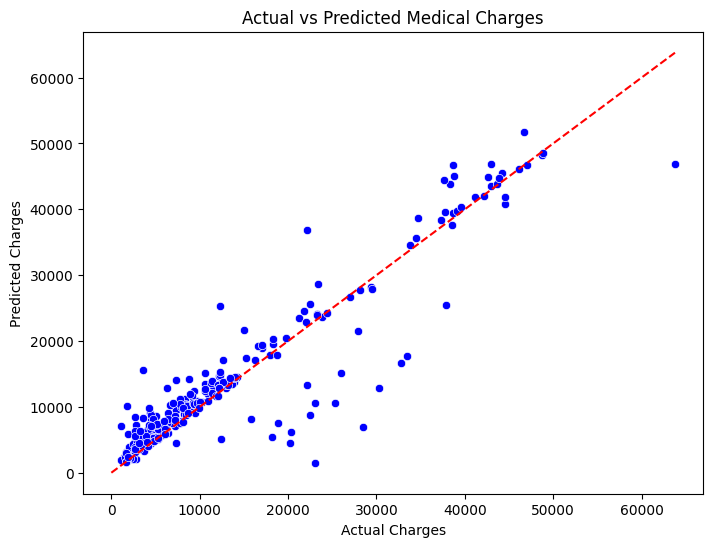

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Show Actual vs Predicted Charges
results = pd.DataFrame({'Actual Charges': y_test.values, 'Predicted Charges': y_pred})
print("\nSample Predictions (Actual vs Predicted):")
print(results.head(10))

# Optional: Plot Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 6))
importances.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance')
plt.show()

# Optional: Plot Actual vs Predicted
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=results['Actual Charges'], y=results['Predicted Charges'], color='blue')
plt.plot([0, max(results['Actual Charges'])], [0, max(results['Actual Charges'])], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Medical Charges')
plt.show()

In [7]:
test_data=X_test.copy()
test_data['Actual Charges']=y_test
test_data.head(10)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,Actual Charges
764,45,25.175,2,False,False,False,False,False,9095.06825
887,36,30.020,0,False,False,True,False,False,5272.17580
890,64,26.885,0,False,True,True,False,False,29330.98315
1293,46,25.745,3,True,False,True,False,False,9301.89355
259,19,31.920,0,True,True,True,False,False,33750.29180
1312,34,42.900,1,True,False,False,False,True,4536.25900
899,19,22.515,0,False,False,True,False,False,2117.33885
752,64,37.905,0,True,False,True,False,False,14210.53595
1286,28,17.290,0,False,False,False,False,False,3732.62510
707,49,28.690,3,True,False,True,False,False,10264.44210


In [8]:
high_risk = results[results['Predicted Charges'] > 20000]
print(high_risk)

     Actual Charges  Predicted Charges
2       29330.98315       28239.647086
4       33750.29180       34640.860712
13      46151.12450       46115.816236
14      48673.55880       48309.169005
15      44202.65360       45443.132808
17      42969.85270       43569.168927
19      21774.32215       24485.814565
38      23887.66270       23689.664104
39      38709.17600       39453.937553
48      42124.51530       42061.500528
57      38746.35510       45057.998239
62      27941.28758       21462.766080
81      28101.33305       27705.763541
83      38511.62830       37580.095717
84      44501.39820       40730.268147
85      41097.16175       41863.309807
91      27037.91410       26749.361739
92      23401.30575       28663.554384
94      38282.74950       43912.490075
96      19719.69470       20438.998293
107     21195.81800       23510.338249
109     23244.79020       24071.593912
113     37701.87680       39641.182884
117     22478.60000       25568.563710
135     12347.17200      

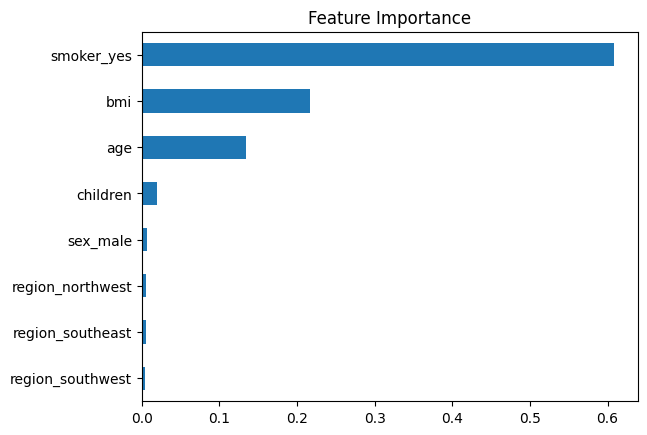

In [9]:
importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()

In [11]:
import pickle
pickle.dump(model, open('rf_model.pkl', 'wb'))